In [1]:
!pip install shap
!pip install neptune

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.9/487.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.6 MB/s eta 0:00:00
  Created wheel for bravado-core: filename=bravado_core-6.1.1-py2.py3-none-any.whl size=67675 sha256=5ac57a14ccae09ccf7e5c9e86313463b45ab90fb9a9303b0eb556d898d8eff4a
  Stored in directory: /root/.cache/pip/wheels/cf/d7/1c/1d707a21e0a0323bdbfbb2f6de125ae6bb70d62aa2838df321
Successfully built bravado-core


In [2]:

import pandas as pd
import transformers
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
from transformers import pipeline
import shap
import numpy as np


In [3]:
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels = 3)
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, max_length=64, truncation=True, padding = 'max_length',return_all_scores=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [4]:
explainer = shap.Explainer(pipe)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

 **Single input plot**

In [5]:
input_text = ["Bitcoin will fall down. it will be very fast ."]
input_text2 = ["At Stock Options Channel, our YieldBoost formula has looked up and down the A options chain for the new August 2024 contracts and identified one put and one call contract of particular interest. Should the contract expire worthless, the premium would represent a 3.60% return on the cash commitment, or 5.45% annualized — at Stock Options Channel we call this the YieldBoost. Below is a chart showing A's trailing twelve month trading history, with the $150.00 strike highlighted in red: Considering the fact that the $150.00 strike represents an approximate 8% premium to the current trading price of the stock (in other words it is out-of-the-money by that percentage), there is also the possibility that the covered call contract would expire worthless, in which case the investor would keep both their shares of stock and the premium collected."]
merge_text = input_text+input_text2
shap_values = explainer(merge_text)
shap.plots.text(shap_values)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [00:12, 12.33s/it]               


In [6]:
preds = pipe(merge_text)
print(preds)

[[{'label': 'positive', 'score': 0.046967513859272}, {'label': 'negative', 'score': 0.6974135637283325}, {'label': 'neutral', 'score': 0.2556189298629761}], [{'label': 'positive', 'score': 0.11462029069662094}, {'label': 'negative', 'score': 0.026723140850663185}, {'label': 'neutral', 'score': 0.8586565256118774}]]


**Single input values**

In [7]:
shap_values[0]

.values =
array([[ 0.        ,  0.        ,  0.        ],
       [-0.00292965,  0.01356472, -0.01063507],
       [-0.01374742, -0.04965397,  0.06340143],
       [-0.01429055,  0.09161526, -0.0773247 ],
       [-0.00274899,  0.02872651, -0.02597752],
       [-0.11798961,  0.28396428, -0.16597468],
       [-0.01848491,  0.09957222, -0.0810873 ],
       [-0.03872951, -0.01033876,  0.04906827],
       [ 0.01493163,  0.00612448, -0.02105615],
       [ 0.02509238, -0.07179243,  0.04670006],
       [-0.01045224,  0.0499041 , -0.03945185],
       [ 0.00918158,  0.03733202, -0.04651358],
       [ 0.00293889,  0.00129184, -0.00423072],
       [-0.01623922,  0.06234244, -0.04610323],
       [ 0.        ,  0.        ,  0.        ]])

.base_values =
array([0.23043515, 0.15476087, 0.61480397])

.data =
array(['', 'Bit', 'co', 'in ', 'will ', 'fall ', 'down', '. ', 'it ',
       'will ', 'be ', 'very ', 'fast ', '.', ''], dtype=object)

In [9]:
shap_values.values

array([array([[ 0.        ,  0.        ,  0.        ],
              [-0.00292965,  0.01356472, -0.01063507],
              [-0.01374742, -0.04965397,  0.06340143],
              [-0.01429055,  0.09161526, -0.0773247 ],
              [-0.00274899,  0.02872651, -0.02597752],
              [-0.11798961,  0.28396428, -0.16597468],
              [-0.01848491,  0.09957222, -0.0810873 ],
              [-0.03872951, -0.01033876,  0.04906827],
              [ 0.01493163,  0.00612448, -0.02105615],
              [ 0.02509238, -0.07179243,  0.04670006],
              [-0.01045224,  0.0499041 , -0.03945185],
              [ 0.00918158,  0.03733202, -0.04651358],
              [ 0.00293889,  0.00129184, -0.00423072],
              [-0.01623922,  0.06234244, -0.04610323],
              [ 0.        ,  0.        ,  0.        ]]),
       array([[-7.52354910e-04, -1.62005858e-03,  2.37240766e-03],
              [-7.52354910e-04, -1.62005858e-03,  2.37240766e-03],
              [-7.52354910e-04, -1.6200

In [10]:
shap_values.data

(array(['', 'Bit', 'co', 'in ', 'will ', 'fall ', 'down', '. ', 'it ',
        'will ', 'be ', 'very ', 'fast ', '.', ''], dtype=object),
 array(['', 'At ', 'Stock ', 'Options ', 'Channel', ', ', 'our ', 'Yield',
        'Bo', 'ost ', 'formula ', 'has ', 'looked ', 'up ', 'and ',
        'down ', 'the ', 'A ', 'options ', 'chain ', 'for ', 'the ',
        'new ', 'August ', '202', '4 ', 'contracts ', 'and ',
        'identified ', 'one ', 'put ', 'and ', 'one ', 'call ',
        'contract ', 'of ', 'particular ', 'interest', '. ', 'Should ',
        'the ', 'contract ', 'ex', 'pire ', 'worthless', ', ', 'the ',
        'premium ', 'would ', 'represent ', 'a ', '3', '.', '60', '% ',
        'return ', 'on ', 'the ', 'cash ', 'commitment', ', ', 'or ', '5',
        '.', '45', '% ', 'annual', 'ized ', '— ', 'at ', 'Stock ',
        'Options ', 'Channel ', 'we ', 'call ', 'this ', 'the ', 'Yield',
        'Bo', 'ost', '. ', 'Below ', 'is ', 'a ', 'chart ', 'showing ',
        'A', "'", 's 

get most important word for each class

In [11]:
columns = {'bearish':0 , 'neutral':1 , 'bullish':2}

In [12]:
def most_influential_word(class_number , shap_values, sample_num):
  max_value_index = np.argmax(np.abs(shap_values.values[sample_num][:,class_number]))
  word = shap_values.data[sample_num][max_value_index]
  return word

In [13]:
most_influential_word(columns['bearish'] , shap_values, 1)

'. '

get the most critical word

In [14]:
def get_most_critical_word(shap_values, sample_num):
  row_sums = np.sum(np.abs(shap_values.values[sample_num]), axis=1)
  max_value_index = np.argmax(row_sums)
  return shap_values.data[sample_num][max_value_index]

In [15]:
get_most_critical_word(shap_values=shap_values, sample_num=1)

'. '

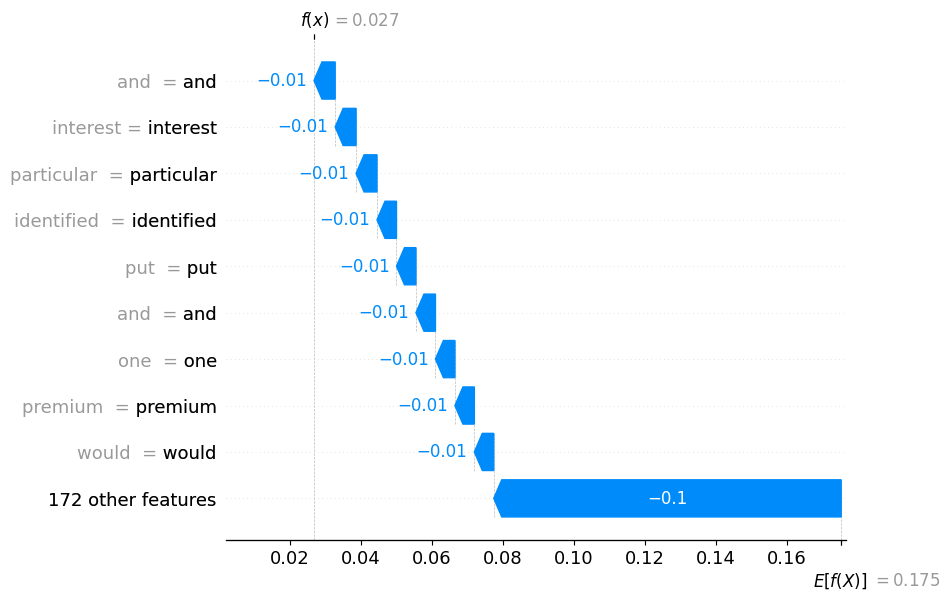

In [16]:
sample_num = 1
shap.plots.waterfall(shap_values[sample_num,:,columns['neutral']])